<a href="https://colab.research.google.com/github/FarazAhmad2/EDA-on-Hotel-Booking/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', 50)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading csv File
file_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Hotel Booking Analysis - Faraz Ahmad/Hotel Bookings.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Checking for null values
df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

###The columns “agent” and “company” have a high number of missing values. As these columns won’t be relevant for our analysis, we can delete them.


In [7]:
df = df.drop(['company','agent'], axis=1)

###The columns “children” and “country” have a small number of missing values. We will remove the full row on missing cells.


In [8]:
df = df.dropna(axis=0).reset_index(drop=True)

In [9]:
df.isna().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year           

In [10]:
# Checking if there are no guests
df[(df.adults + df.babies + df.children == 0)].shape

(170, 30)

In [11]:
# These rows does not make any sense. So, dropping these rows
df = df.drop(df[(df.adults + df.babies + df.children == 0)].index).reset_index(drop=True)

In [12]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000
mean,0.371757,104.401312,2016.157596,27.165100,15.800965,0.928307,2.500918,1.861052,0.104356,0.007959,0.031593,0.087208,0.131612,0.218828,2.330638,102.133442,0.061915,0.571778
std,0.483276,106.915284,0.707456,13.586362,8.780412,0.992725,1.889089,0.574697,0.399439,0.097449,0.174915,0.846419,1.485300,0.638914,17.633065,50.389602,0.244230,0.792740
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,70.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000


 # **1.How many bookings were cancelled or not (Hotel wise) ?**

In [13]:
booking_info = pd.DataFrame(df.groupby('hotel')['is_canceled'].value_counts())
booking_info.columns = ['no of bookings']
booking_info['percentage'] = df.groupby('hotel')['is_canceled'].value_counts(normalize=True)*100
booking_info

no of bookings  percentage
hotel        is_canceled                            
City Hotel   0                     46082   58.226249
             1                     33061   41.773751
Resort Hotel 0                     28508   72.017178
             1                     11077   27.982822

[Text(0.5, 0, 'Hotels')]

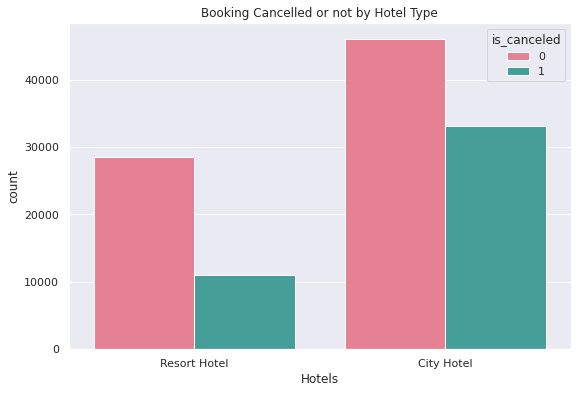

In [14]:
plt.rcParams['figure.figsize'] = (9, 6)
plt.title("Booking Cancelled or not by Hotel Type")
sns.countplot(x='hotel',data=df,hue='is_canceled', palette='husl').set(xlabel='Hotels')

# **2. Booking ratio between hotels**

In [15]:
preference = pd.DataFrame(df.hotel.value_counts())
preference['percentage'] = df.hotel.value_counts(normalize=True)*100
preference.index.name = 'hotel'
preference.rename({'hotel': 'no of bookings'},axis=1,inplace=True)
preference

,no of bookings,percentage
hotel,,
City Hotel,79143,66.659086
Resort Hotel,39585,33.340914


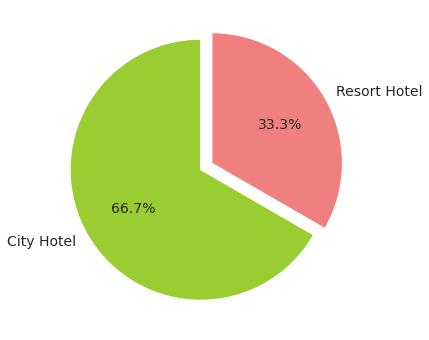

In [16]:
labels = df['hotel'].value_counts().index.tolist()

sizes = df['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

### As we can see, booking rate of City Hotel is higher.

# **3. Which month has the highest number of arrivals ?**

In [17]:
confirmed_bookings = df.loc[df.is_canceled == 0]
confirmed_bookings.reset_index(drop=True, inplace=True)
people_arrival_count_df = pd.DataFrame(confirmed_bookings['arrival_date_month'].value_counts())#.reset_index()
people_arrival_count_df.columns = ['No of bookings']
people_arrival_count_df.index.name = 'arrival_date_month'
people_arrival_count_df['booking_percentage'] = confirmed_bookings['arrival_date_month'].value_counts(normalize=True)*100
people_arrival_count_df

,No of bookings,booking_percentage
arrival_date_month,,
August,8604,11.535058
July,7880,10.564419
May,7091,9.506636
October,6854,9.188899
March,6566,8.802789
April,6528,8.751843
June,6384,8.558788
September,6360,8.526612
February,5304,7.110873


[Text(0, 0.5, 'Bookings count'), Text(0.5, 0, 'Months')]

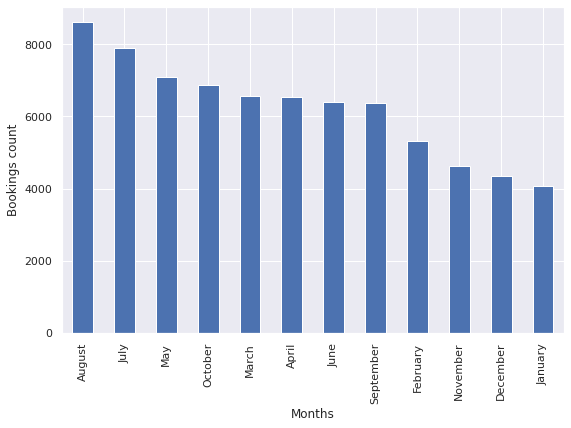

In [18]:
confirmed_bookings['arrival_date_month'].value_counts().plot(kind='bar').set(xlabel=('Months'), ylabel=('Bookings count'))

### The month of highest occupation is august with 11.53% of the reservations. The month of lest occupation is january with 5.44% of the reservations.

# **4.Hotel wise yearly bookings**

In [19]:
yrly_bookings = pd.DataFrame(confirmed_bookings.groupby('arrival_date_year')['hotel'].value_counts())
yrly_bookings.columns = ['No of bookings']
yrly_bookings

No of bookings
arrival_date_year hotel                       
2015              City Hotel              7654
                  Resort Hotel            6071
2016              City Hotel             22662
                  Resort Hotel           13389
2017              City Hotel             15766
                  Resort Hotel            9048

Text(0.5, 1.0, 'yearly bookings')

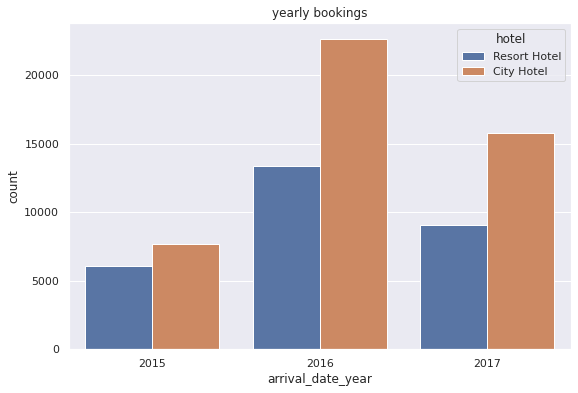

In [20]:
sns.countplot (x= 'arrival_date_year', data=confirmed_bookings, hue= 'hotel').set_title ('yearly bookings')

# **5. From which country the people are coming most ?**

In [21]:
#  Top 10 countries from where the people are coming most
country = pd.DataFrame(confirmed_bookings.country.value_counts())
country.columns= ['no of bookings']
country.head(10)

,no of bookings
PRT,20977
GBR,9668
FRA,8468
ESP,6383
DEU,6067
IRL,2542
ITA,2428
BEL,1868
NLD,1716
USA,1592


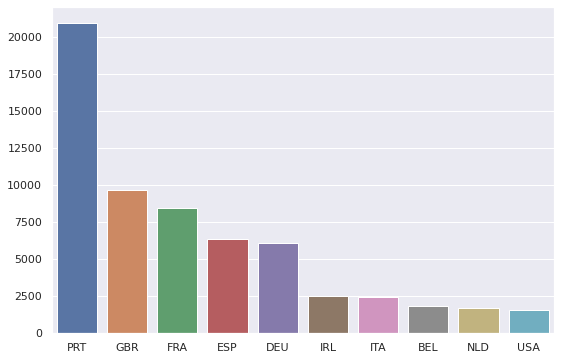

In [22]:
sns.barplot (y= list(confirmed_bookings.country.value_counts().head (10)), x= list(confirmed_bookings.country.value_counts().head(10).index))

# **6. Market Segment wise bookings**

### In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”


In [23]:
mrkt_df = pd.DataFrame(confirmed_bookings.market_segment.value_counts())
mrkt_df.index.name = 'market_segment'
mrkt_df.columns = ['no of booking']
mrkt_df

,no of booking
market_segment,
Online TA,35599
Offline TA/TO,15854
Direct,10504
Groups,7692
Corporate,4121
Complementary,637
Aviation,183


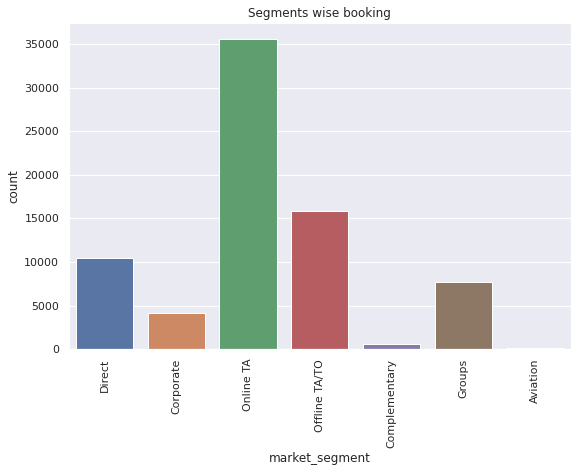

In [24]:
plt.title("Segments wise booking")
ax = sns.countplot(x = "market_segment", data = confirmed_bookings)
plt.xticks(rotation = 90)
plt.show()

# **7. Prices per month**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


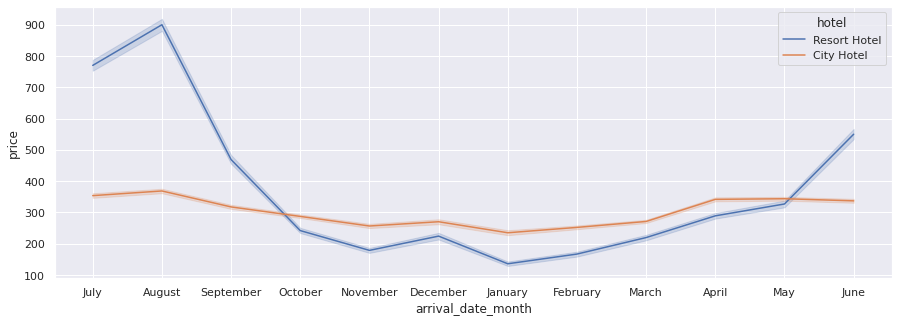

In [25]:
plt.figure(figsize=(15,5))

# Calculating average daily rate per person
df['adr_pp'] = df['adr'] / (df['adults'] + df['children']) 
actual_guests = df.loc[df["is_canceled"] == 0]
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.show()

### Here, we can see prices for resort hotels are higher and fluctuate more than city hotels.
### For Resort Hotel, prices are extremely high during Summer i.e. June. July & August.
### For City Hotel, prices are slightly more during April, May, June, July and August.

# **8. How long people are staying ?**

[Text(0, 0.5, 'Booking Percentage (%)'),
 Text(0.5, 0, 'Number of Nights'),
 Text(0.5, 1.0, 'Night Stay Duration (Top 10)')]

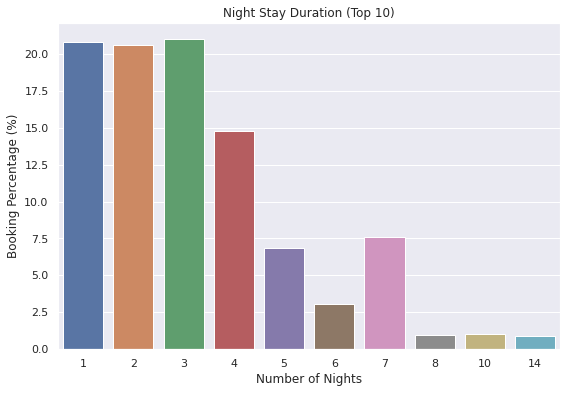

In [26]:
stay = (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights']).value_counts(normalize=True)*100
sns.barplot(y=list(stay.head(10)), x=list(stay.head(10).index)).set( xlabel='Number of Nights', ylabel='Booking Percentage (%)', title='Night Stay Duration (Top 10)')

### Most people stay for one, two, or three nights. More than 60% of guests come under these three options.

# **9. Which is the most reserved room type ?**

In [27]:
room_type = pd.DataFrame(df.reserved_room_type.value_counts(normalize=True)*100)
room_type.columns = ['booking percentage']
room_type.index.name = 'room type'
room_type

,booking percentage
room type,
A,71.996496
D,16.130146
E,5.458696
F,2.431608
G,1.752746
B,0.935752
C,0.783303
H,0.506199
L,0.005054


[Text(0, 0.5, 'Booking Percentage (%)'), Text(0.5, 0, 'Room type')]

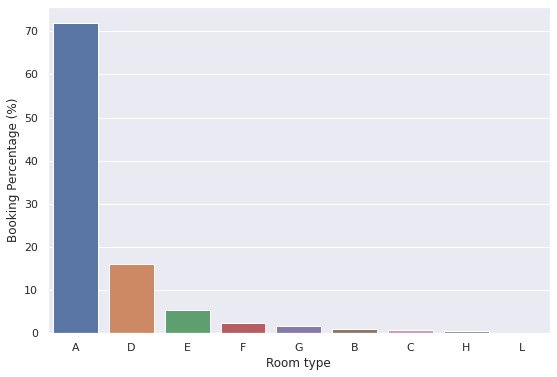

In [28]:
sns.barplot(y=list(room_type['booking percentage']),x=list(room_type.index)).set(xlabel='Room type',ylabel='Booking Percentage (%)')

### The “A” room type is the most popular among the clients, with 71.99% of the reservations.

# **10. What is the most common customer type ?**

In [29]:
customer_type =pd.DataFrame(df.customer_type.value_counts(normalize=True)*100)
customer_type.columns = ['booking percentage']
customer_type.index.name = 'customer type'
customer_type

,booking percentage
customer type,
Transient,75.000000
Transient-Party,21.091908
Contract,3.429688
Group,0.478404


[Text(0, 0.5, 'Booking Percentage (%)'), Text(0.5, 0, 'Customer type')]

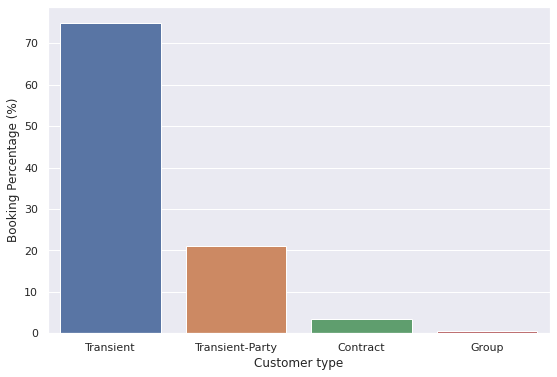

In [37]:
sns.barplot(y=list(customer_type['booking percentage']), x=list(customer_type.index)).set(xlabel='Customer type',ylabel='Booking Percentage (%)')

# **11.  What is the most popular meal package ?**


In [30]:
meal = pd.DataFrame(df.meal.value_counts(normalize=True)*100)
meal.index.name = 'meal_type'
meal.columns = ['percentage']
meal

,percentage
meal_type,
BB,77.310323
HB,12.152988
SC,8.883330
Undefined,0.981234
FB,0.672125


[Text(0, 0.5, 'Percentage (%)'), Text(0.5, 0, 'Meal type')]

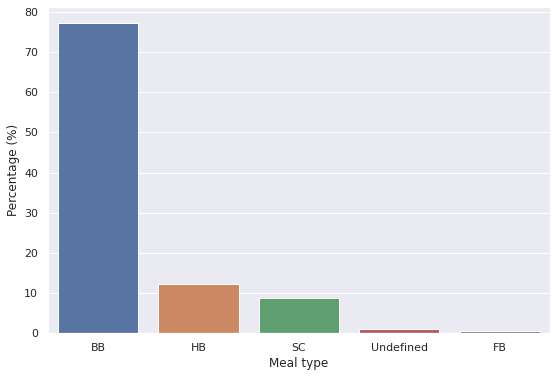

In [38]:
sns.barplot(y=list(meal.percentage), x=list(meal.index)).set(xlabel='Meal type',ylabel='Percentage (%)')

#### Out of the meals, BB (Bed & Breakfast) is the most ordered meal which is around 77.31%, followed by HB(Half Board), SC(no meal package), Undefined and FB (Full Board).

# **12. What is the relationship between lead time and cancellation ?**

### The Booking Lead Time is the number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel.

(array([21431.,  9178.,  6931.,  6727.,  5480.,  4950.,  4648.,  4129.,
         3922.,  3716.,  3434.,  3310.,  2712.,  2789.,  2562.,  2841.,
         2695.,  2358.,  2431.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190]),
 <a list of 19 Patch objects>)

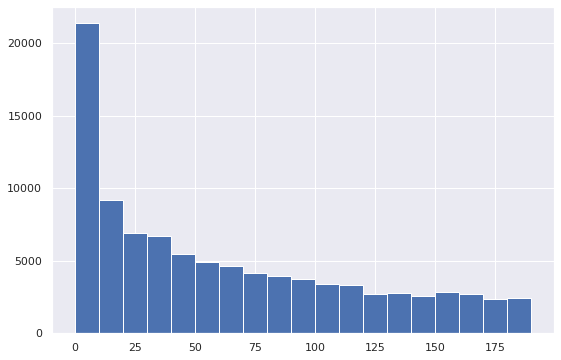

In [31]:
plt.hist (df.lead_time, bins= np.arange(0,200,10))

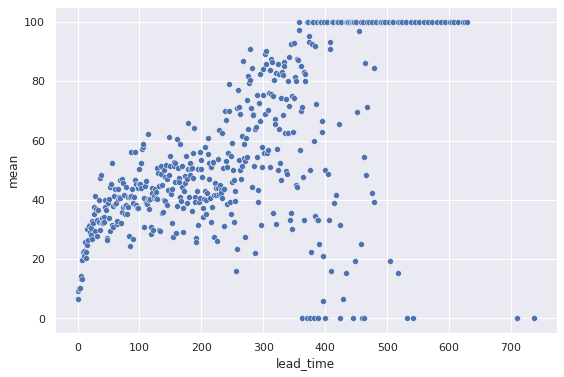

In [32]:
a = df.groupby("lead_time")['is_canceled'].describe()
sns.scatterplot(x=a.index, y=a["mean"] * 100)

### Lead time has a positive correlation with cancellation.
### Higher lead time has higher chance of cancellation.

# **13. What is the relationship between deposit type and cancellation ?**


In [33]:
dep = pd.DataFrame(df.groupby('deposit_type')['is_canceled'].value_counts())
dep['cancellation percentage'] = df.groupby('deposit_type')['is_canceled'].value_counts(normalize=True)*100
dep.columns = ['cancellation count','cancellation percentage']
dep

cancellation count  cancellation percentage
deposit_type is_canceled                                             
No Deposit   0                         74371                71.515390
             1                         29622                28.484610
Non Refund   1                         14480                99.361834
             0                            93                 0.638166
Refundable   0                           126                77.777778
             1                            36                22.222222

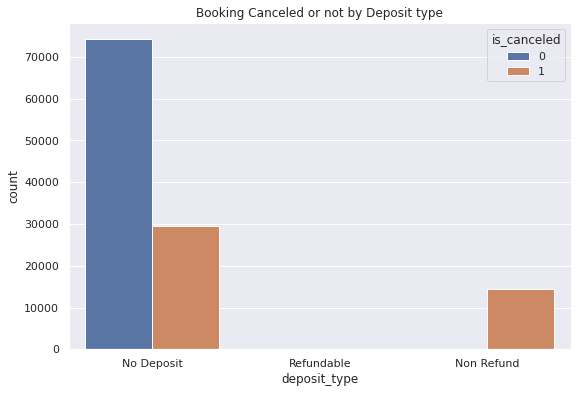

In [34]:
plt.title("Booking Canceled or not by Deposit type")
sns.countplot(x='deposit_type',data=df ,hue='is_canceled')

### Around 25% of bookings were cancelled by guests with no deposit. These numbers are huge if the hotels were not able to replace the cancelled bookings in time. So it's obvious that guests who do not pay any deposit while booking are likely to cancel more reservations. Also it is interesting to note that non-refundable deposits had more cancellation than refundable deposits. Logically one would have assumed that refundable deposits have more cancellation as hotel rates are usually higher for refundable deposit type rooms and customers pay more in anticipation of cancellation.

# **Conclusion**



* ####  Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.
* ####  We should also target months between May to Aug. Those are peak months due to the summer period.

* ####  Majority of the guests are from Western Europe. We should spend a significant amount of our budget on those area.
* ####  No deposit cancellations are high compared to other categories but these should not be discouraged per se as bookings in this category are also very high compared to non refundable type bookings.





